**make_blobs**

This is a non-linearity multi-class classification problem from Scikit learn [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

## 1. Get the data

In [ ]:
# Import Dependencis
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5, # give the clusters a little shake up
                            random_state = RANDOM_SEED)
X_blob[:5], y_blob[:5]

(array([[-8.41339595,  6.93516545],
        [-5.76648413, -6.43117072],
        [-6.04213682, -6.76610151],
        [ 3.95083749,  0.69840313],
        [ 4.25049181, -0.28154475]]),
 array([3, 2, 2, 1, 1]))

In [ ]:
# 2. Turn data into tensor
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob[:5], y_blob[:5]

(tensor([[-8.4134,  6.9352],
         [-5.7665, -6.4312],
         [-6.0421, -6.7661],
         [ 3.9508,  0.6984],
         [ 4.2505, -0.2815]]),
 tensor([3, 2, 2, 1, 1]))

In [ ]:
# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)
len(X_blob_train), len(y_blob_train), len(X_blob_test), len(y_blob_test)

(800, 800, 200, 200)

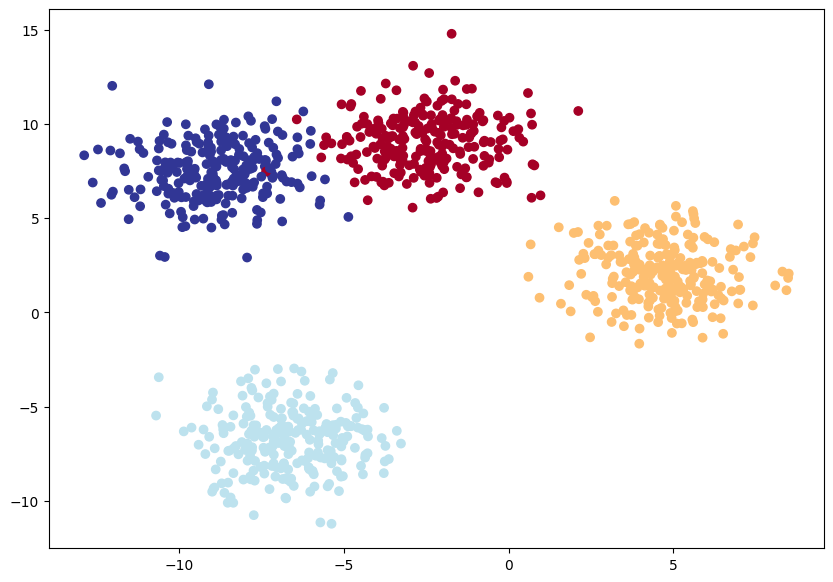

In [ ]:
# 4. Plot data
plt.figure(figsize = (10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c = y_blob, cmap = plt.cm.RdYlBu)

In [ ]:
import requests
from pathlib import Path

# Download helper function from Learn Pytorch repo (if it's not already downloaded)
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists, skipping download')
else:
  print('Download helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/af6548e52663c8395fe2777bd0fbfd6ac85fd6f8/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

Download helper_functions.py


In [ ]:
from helper_functions import plot_predictions, plot_decision_boundary

## 2. Build a multi-class classificaiton model

In [ ]:
# Create device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """
    Initializes multi-class classification model.
    Args:
      input_features (int): Number of input features to the model.
      output_features (int): Number of outputs features. (number of output classes)
      hidden_units (int): Number of hidden units (neurons) between layers, default 8.
    Returns:
    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(), # try the model without RelU
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

In [ ]:
# Create an isntance of BlobModel and sen it to the target device
model = BlobModel(input_features = NUM_FEATURES,
                  output_features = NUM_CLASSES,
                  hidden_units = 8).to(device)

In [ ]:
model

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
# Let's visualize the parameters
list(model.parameters())

[Parameter containing:
 tensor([[-0.1972,  0.3649],
         [ 0.5947, -0.1910],
         [ 0.5992,  0.5318],
         [ 0.5894,  0.6807],
         [-0.3922, -0.0557],
         [ 0.6900,  0.2511],
         [-0.5334,  0.4766],
         [ 0.3832,  0.5955]], requires_grad=True),
 Parameter containing:
 tensor([-0.6138, -0.4757,  0.3689,  0.1717, -0.0834, -0.6687, -0.2743,  0.6560],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.2380,  0.1983,  0.2294, -0.1503, -0.0034,  0.3059, -0.0720,  0.1596],
         [ 0.0696,  0.2023,  0.2303,  0.1479,  0.3252, -0.1598, -0.0773, -0.0538],
         [-0.3295, -0.1761, -0.2636, -0.0863,  0.3155, -0.2098,  0.3206,  0.1384],
         [ 0.1506,  0.1733, -0.2840,  0.0417, -0.3468,  0.1352, -0.1470,  0.2765],
         [-0.0284, -0.2754,  0.0820, -0.1818, -0.1618, -0.1714, -0.1940, -0.0162],
         [-0.3487, -0.2632,  0.2230, -0.1279,  0.2016, -0.0290,  0.0279,  0.2374],
         [-0.2026, -0.1280, -0.3019, -0.1655,  0.1815,  0.1508, -0.2

In [ ]:
# Create a loss function for multi-class classification - loss function measures how wrong our model'spredictions are
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classifcation - Optimizer updates our model parameters to try an reduce the loss
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.1) # learning rate is a hyperparameter you cam change

In [ ]:
# Let's get some raw outputs (logits) from our model without training
model.eval()
with torch.inference_mode():
  y_logits = model(X_blob_test.to(device))
y_logits.shape, y_logits[:10]

(torch.Size([200, 4]),
 tensor([[ 0.1656,  1.7709, -0.6239,  0.5601],
         [ 0.2448,  0.3382, -0.5472,  0.1709],
         [ 0.5081,  0.5330, -0.2208, -0.0866],
         [ 0.1389,  1.0448, -0.4998,  0.1904],
         [ 0.2009,  1.9021, -0.5542,  0.6144],
         [ 0.2324,  0.3670, -0.6038,  0.2546],
         [ 0.4533,  0.4789, -0.2133, -0.1197],
         [ 0.2535,  1.3893, -0.4021,  0.3223],
         [ 0.5889,  0.6549, -0.2569,  0.0690],
         [ 0.2208,  1.5426, -0.4637,  0.4225]]))

In [ ]:
# Convert our model's logit output to prediction probabilitites
y_pred_probs = torch.softmax(y_logits, dim = 1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.1656,  1.7709, -0.6239,  0.5601],
        [ 0.2448,  0.3382, -0.5472,  0.1709],
        [ 0.5081,  0.5330, -0.2208, -0.0866],
        [ 0.1389,  1.0448, -0.4998,  0.1904],
        [ 0.2009,  1.9021, -0.5542,  0.6144]])
tensor([[0.1263, 0.6289, 0.0574, 0.1874],
        [0.2874, 0.3155, 0.1302, 0.2669],
        [0.3269, 0.3351, 0.1577, 0.1803],
        [0.1978, 0.4895, 0.1045, 0.2083],
        [0.1182, 0.6476, 0.0555, 0.1787]])


In [ ]:
# where is the position from the max value
torch.argmax(y_pred_probs, dim = 1)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

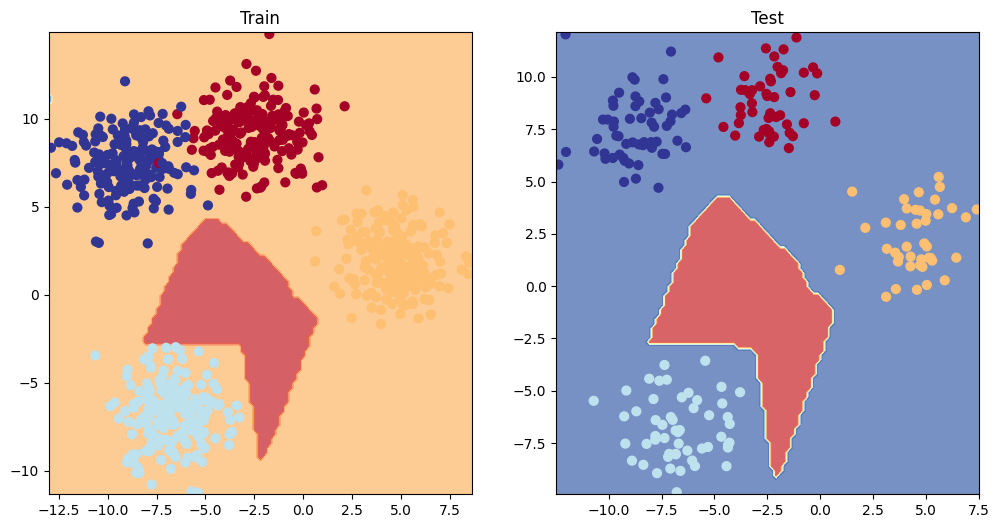

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X_blob_test, y_blob_test)

Not good...Let's train our model

## 3. Creating a training loop and testing loop for multi-class PyTorch model

In [ ]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
# Fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to the target deivce
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Loop through the data
for epoch in range(epochs):
  ### Training
  model.train()

  y_logits = model(X_blob_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(X_blob_test)
    test_preds = torch.softmax(test_logits, dim = 1).argmax(dim = 1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                           y_pred = test_preds)

  # Print what is happening
  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | Test Loss: {test_loss:.2f} Test acc: {test_acc:.2f}')

Epoch: 0 | Loss: 1.3697, Acc: 26.12 | Test Loss: 1.26 Test acc: 45.50
Epoch: 10 | Loss: 0.6588, Acc: 73.50 | Test Loss: 0.63 Test acc: 73.00
Epoch: 20 | Loss: 0.3171, Acc: 98.62 | Test Loss: 0.29 Test acc: 100.00
Epoch: 30 | Loss: 0.1008, Acc: 99.38 | Test Loss: 0.09 Test acc: 99.50
Epoch: 40 | Loss: 0.0598, Acc: 99.38 | Test Loss: 0.05 Test acc: 99.50
Epoch: 50 | Loss: 0.0466, Acc: 99.38 | Test Loss: 0.04 Test acc: 99.50
Epoch: 60 | Loss: 0.0402, Acc: 99.38 | Test Loss: 0.03 Test acc: 99.50
Epoch: 70 | Loss: 0.0364, Acc: 99.38 | Test Loss: 0.03 Test acc: 99.50
Epoch: 80 | Loss: 0.0339, Acc: 99.25 | Test Loss: 0.02 Test acc: 99.50
Epoch: 90 | Loss: 0.0321, Acc: 99.25 | Test Loss: 0.02 Test acc: 99.50


## 5. Making an evalauting prediction wit PyTorch multi-class model

In [ ]:
# Make predictions
model.eval()
with torch.inference_mode():
  y_logits = model(X_blob_test)

y_logits[:5]

tensor([[ 3.1211, 10.0290, -0.7461, -3.9749],
        [ 1.1374, -6.4916,  0.4661,  6.9340],
        [-2.2781, -1.2175,  5.6305, -0.7546],
        [ 1.0044,  6.0222, -0.2303, -2.3790],
        [ 9.5381,  4.1432, -1.9517, -0.8483]])

In [ ]:
# Go from logits - Prediction prob
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:5]

tensor([[9.9885e-04, 9.9898e-01, 2.0893e-05, 8.2743e-07],
        [3.0240e-03, 1.4701e-06, 1.5453e-03, 9.9543e-01],
        [3.6642e-04, 1.0582e-03, 9.9689e-01, 1.6812e-03],
        [6.5609e-03, 9.9131e-01, 1.9087e-03, 2.2264e-04],
        [9.9544e-01, 4.5193e-03, 1.0187e-05, 3.0709e-05]])

In [ ]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:5]

tensor([1, 3, 2, 1, 0])

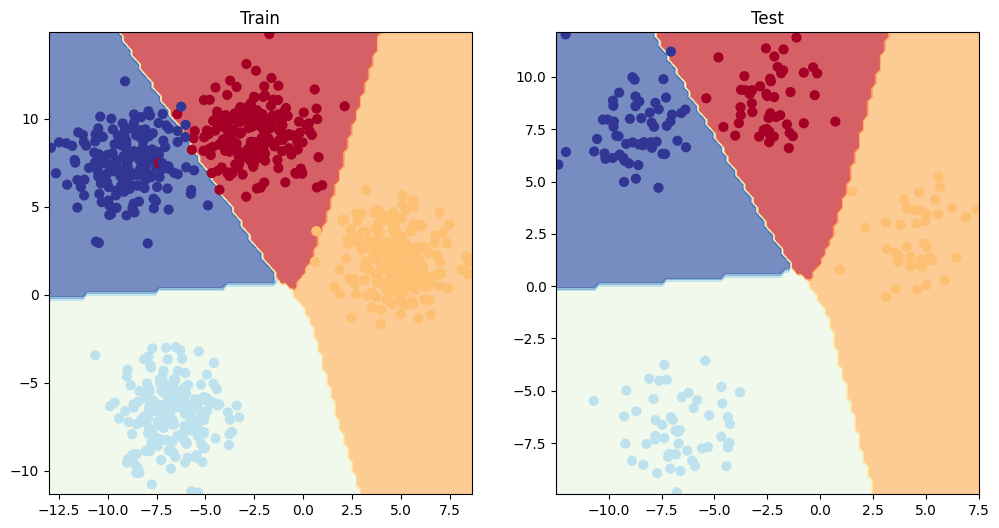

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X_blob_test, y_blob_test)